In [70]:
import pandas as pd
import numpy as np
import scipy as sc
import datetime
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,  AdaBoostRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score,confusion_matrix, classification_report
from sklearn import preprocessing
import scikitplot as skplt
from matplotlib import pyplot as plt
import seaborn as sns
import yellowbrick
from yellowbrick.classifier import ClassificationReport
from sklearn.pipeline import make_pipeline


import os


data = "Auto1_DS_ChallengeData.csv"

# load data
auto1data = pd.read_csv(data)


### Question 1a:
Please guide us through an exploratory data analysis, and explain your findings, e.g.,
- Do you notice any patterns in the data?
- What problems do you observe?
- What solutions would you suggest?

In [71]:
auto1data.head()

,sourcing_country,manufacturer,fuel_type,built_year,mileage,horsepower,kw,bought_date,sold_date,buy_price,sold,sales_channel
0,China,Bentley,Benzin,2005,84569,60,44.0,2015-02-08 11:43:30,2015-02-21 19:31:06,3642.0,1,auction_type1
1,USA,Bentley,Diesel,2006,173065,135,100.0,2015-03-04 18:03:47,2015-03-17 18:58:30,4865.0,1,auction_type1
2,USA,Audi,Benzin,2007,133179,70,51.0,2015-04-12 19:26:26,2015-04-23 18:53:37,1875.0,1,auction_type1
3,USA,Chrysler,Benzin,2003,256134,130,96.0,2015-04-23 11:40:46,2015-05-05 18:36:37,4064.0,1,auction_type1
4,USA,Chrysler,Benzin,2000,102892,100,74.0,2015-05-02 17:04:48,2015-05-13 18:52:22,2656.0,1,auction_type1


In [72]:
auto1data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244699 entries, 0 to 244698
Data columns (total 12 columns):
sourcing_country    244699 non-null object
manufacturer        244699 non-null object
fuel_type           244699 non-null object
built_year          244699 non-null int64
mileage             244699 non-null int64
horsepower          244699 non-null int64
kw                  244699 non-null float64
bought_date         244699 non-null object
sold_date           237993 non-null object
buy_price           244699 non-null float64
sold                244699 non-null int64
sales_channel       244699 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 22.4+ MB


In [73]:
auto1data.describe()

,built_year,mileage,horsepower,kw,buy_price,sold
count,244699.000000,2.446990e+05,244699.000000,244699.000000,244699.000000,244699.000000
mean,2007.282057,1.580208e+05,127.052701,93.434602,15236.388714,0.972595
std,4.940866,4.810826e+06,56.514937,41.571447,18638.783975,0.163261
min,1973.000000,0.000000e+00,27.000000,20.000000,-232.000000,0.000000
25%,2004.000000,8.620200e+04,90.000000,66.000000,3289.000000,1.000000
50%,2008.000000,1.333410e+05,115.000000,85.000000,9402.000000,1.000000
75%,2011.000000,1.886830e+05,150.000000,110.000000,20582.000000,1.000000
max,2018.000000,2.147484e+09,620.000000,456.000000,480116.000000,1.000000


In [74]:
auto1data.isnull().sum().sum() #total number of zero values

6706

In [75]:
auto1data.isnull().sum()


sourcing_country       0
manufacturer           0
fuel_type              0
built_year             0
mileage                0
horsepower             0
kw                     0
bought_date            0
sold_date           6706
buy_price              0
sold                   0
sales_channel          0
dtype: int64

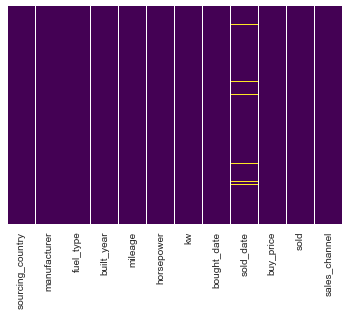

In [76]:
sns.heatmap(auto1data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [77]:
auto1data['sold'].value_counts() 


1    237993
0      6706
Name: sold, dtype: int64

In [78]:
auto1data[auto1data['sold']==0].head()

,sourcing_country,manufacturer,fuel_type,built_year,mileage,horsepower,kw,bought_date,sold_date,buy_price,sold,sales_channel
3008,China,Buick,Benzin,2000,246326,120,88.0,2015-10-28 17:05:27,NaN,633.0,0,auction_type1
3009,USA,Abarth,Benzin,2004,119688,110,80.0,2015-10-24 16:37:28,NaN,3014.0,0,auction_type1
4949,USA,Abarth,Benzin,2005,112382,110,80.0,2015-11-08 15:07:41,NaN,3572.0,0,auction_type1
4950,USA,Alfa Romeo,Benzin,2006,108942,55,40.0,2015-11-14 13:23:23,NaN,1355.0,0,auction_type1
5411,China,Abarth,Diesel,2001,169526,70,51.0,2015-01-21 16:13:02,NaN,2172.0,0,auction_type1


In [79]:
auto = auto1data[auto1data['sold']==1]


Text(0.5, 1, 'auto.corr()')

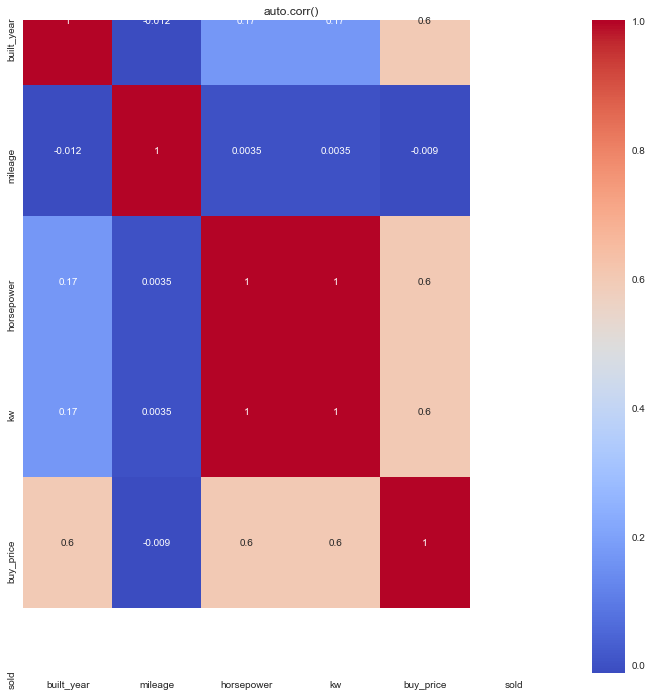

In [80]:
plt.figure(figsize=(12,12))
sns.heatmap(auto.corr(),cmap='coolwarm', annot = True)
plt.title('auto.corr()')


We can drop horsepower column as it is repeated in the dataframe by column kw.

In [81]:
auto1data = auto1data.drop(['horsepower'], axis = 1)

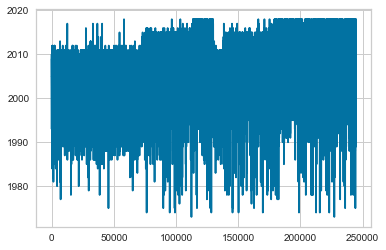

In [82]:
plt.plot(auto1data['built_year'])

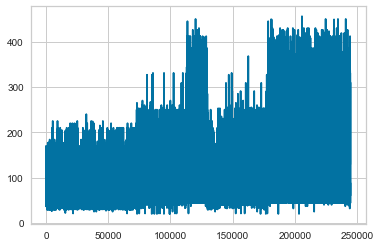

In [83]:
plt.plot(auto1data['kw'])

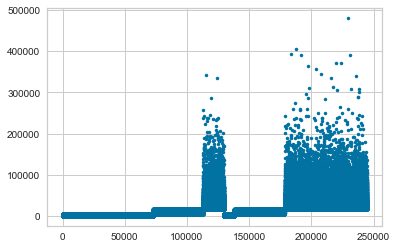

In [84]:
plt.plot(auto1data['buy_price'], 'b.')

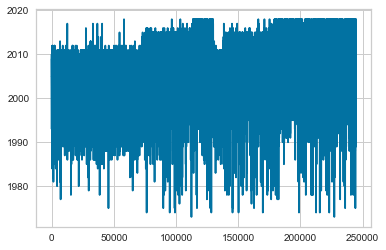

In [85]:
plt.plot(auto1data['built_year'])

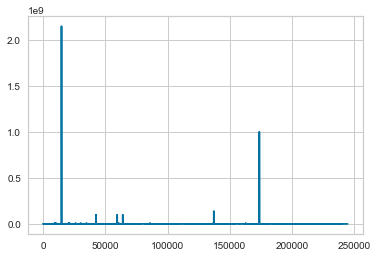

In [86]:
plt.plot(auto1data['mileage'])

In [87]:
auto1data.describe()

,built_year,mileage,kw,buy_price,sold
count,244699.000000,2.446990e+05,244699.000000,244699.000000,244699.000000
mean,2007.282057,1.580208e+05,93.434602,15236.388714,0.972595
std,4.940866,4.810826e+06,41.571447,18638.783975,0.163261
min,1973.000000,0.000000e+00,20.000000,-232.000000,0.000000
25%,2004.000000,8.620200e+04,66.000000,3289.000000,1.000000
50%,2008.000000,1.333410e+05,85.000000,9402.000000,1.000000
75%,2011.000000,1.886830e+05,110.000000,20582.000000,1.000000
max,2018.000000,2.147484e+09,456.000000,480116.000000,1.000000


We see from the described data that in column mileage, that the max value is quite far from the mean value, so it is mostly outliers. We delete them with 0.99 quintile.

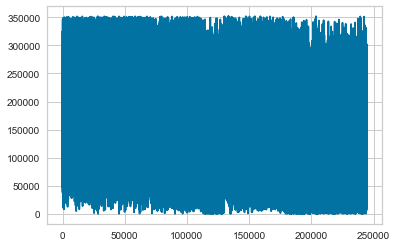

In [88]:
q = auto1data["mileage"].quantile(0.99)
auto1data = auto1data[auto1data["mileage"] < q]
plt.plot(auto1data['mileage'])

In [89]:
auto1data1 = auto1data.copy()

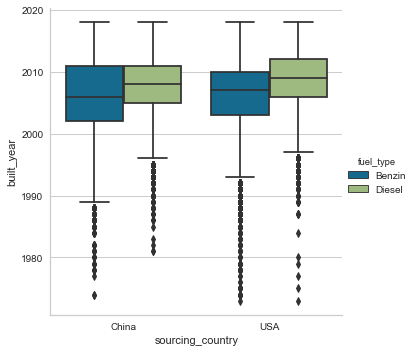

In [90]:
ax= sns.catplot(x="sourcing_country", y="built_year", hue="fuel_type", kind="box", data=auto)


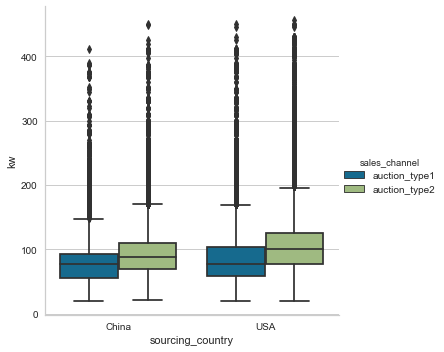

In [91]:
sns.catplot(x="sourcing_country", y="kw", hue="sales_channel", kind="box", data=auto)

In [92]:
auto['fuel_type'].value_counts()

Benzin    138818
Diesel     99175
Name: fuel_type, dtype: int64

In [93]:
auto['sales_channel'].value_counts()

auction_type1    127037
auction_type2    110956
Name: sales_channel, dtype: int64

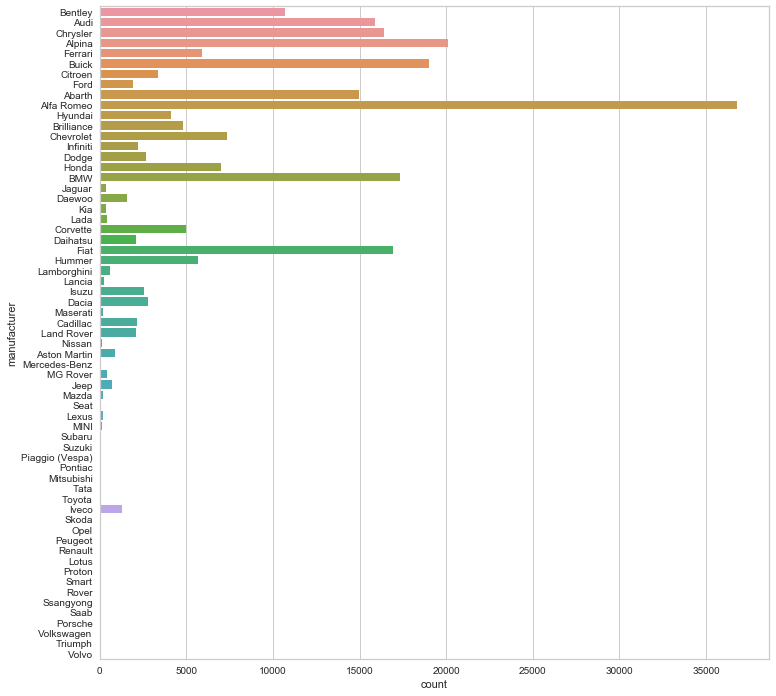

In [94]:
plt.figure(figsize=(12,12))
sns.countplot(y="manufacturer", data=auto)

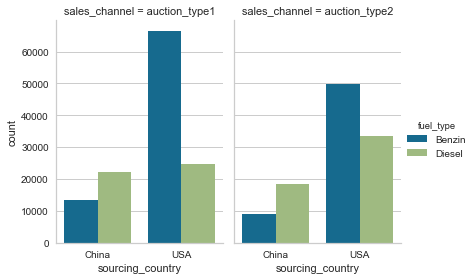

In [95]:
g = sns.catplot(x="sourcing_country", hue="fuel_type", col="sales_channel",data=auto, kind="count",height=4, aspect=.7)

### Question 1b:
Please compute the average number of days that it takes to sell cars. Based on this metric,
which sales channel do you think allows us to sell cars faster? What assumptions do we
need for this result to be valid? If you find any serious violation, does it change the result of
your analysis?

In [96]:
auto['bought_date'] = pd.to_datetime(auto['bought_date'])
auto['sold_date'] = pd.to_datetime(auto['sold_date'])


In [97]:
auto['diff_days'] = auto['sold_date'] - auto['bought_date']
auto['diff_days']=auto['diff_days']/np.timedelta64(1,'D')
auto.head()

,sourcing_country,manufacturer,fuel_type,built_year,mileage,horsepower,kw,bought_date,sold_date,buy_price,sold,sales_channel,diff_days
0,China,Bentley,Benzin,2005,84569,60,44.0,2015-02-08 11:43:30,2015-02-21 19:31:06,3642.0,1,auction_type1,13.324722
1,USA,Bentley,Diesel,2006,173065,135,100.0,2015-03-04 18:03:47,2015-03-17 18:58:30,4865.0,1,auction_type1,13.037998
2,USA,Audi,Benzin,2007,133179,70,51.0,2015-04-12 19:26:26,2015-04-23 18:53:37,1875.0,1,auction_type1,10.977211
3,USA,Chrysler,Benzin,2003,256134,130,96.0,2015-04-23 11:40:46,2015-05-05 18:36:37,4064.0,1,auction_type1,12.288785
4,USA,Chrysler,Benzin,2000,102892,100,74.0,2015-05-02 17:04:48,2015-05-13 18:52:22,2656.0,1,auction_type1,11.074699


In [98]:
auto['diff_days'].mean()

32.355836972416796

<Figure size 3240x720 with 0 Axes>

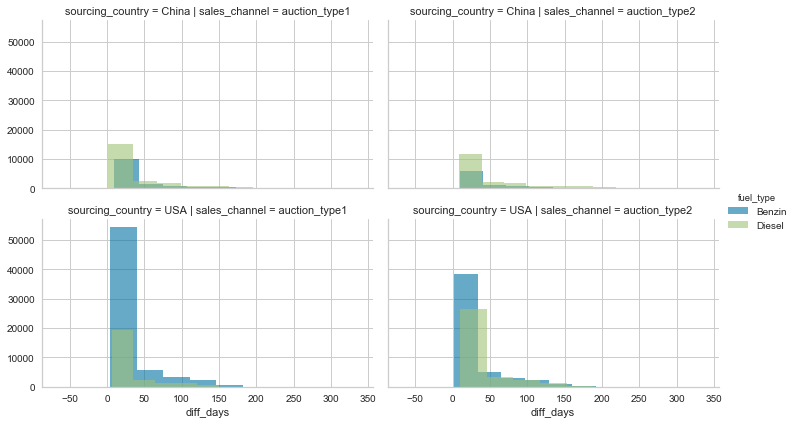

In [99]:
plt.figure(figsize=(45,10))
g = sns.FacetGrid(auto, row='sourcing_country', col='sales_channel', hue = 'fuel_type', aspect=1.7)
g.map(plt.hist, "diff_days", alpha = 0.6)
g.add_legend()
plt.show()

In [100]:
auto.groupby('sales_channel')['diff_days'].mean()

sales_channel
auction_type1    30.633266
auction_type2    34.328063
Name: diff_days, dtype: float64

we need consider cars which are still not sold!!

In [101]:
auto0 = auto1data[auto1data['sold']==0]
auto0.head()

,sourcing_country,manufacturer,fuel_type,built_year,mileage,kw,bought_date,sold_date,buy_price,sold,sales_channel
3008,China,Buick,Benzin,2000,246326,88.0,2015-10-28 17:05:27,NaN,633.0,0,auction_type1
3009,USA,Abarth,Benzin,2004,119688,80.0,2015-10-24 16:37:28,NaN,3014.0,0,auction_type1
4949,USA,Abarth,Benzin,2005,112382,80.0,2015-11-08 15:07:41,NaN,3572.0,0,auction_type1
4950,USA,Alfa Romeo,Benzin,2006,108942,40.0,2015-11-14 13:23:23,NaN,1355.0,0,auction_type1
5411,China,Abarth,Diesel,2001,169526,51.0,2015-01-21 16:13:02,NaN,2172.0,0,auction_type1


In [102]:
auto0['diff_days'] = pd.datetime.now() -pd.to_datetime(auto0['bought_date'])
auto0['diff_days']=auto0['diff_days']/np.timedelta64(1,'D')
auto0.head()

C:\Users\Natallia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Natallia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sourcing_country,manufacturer,fuel_type,built_year,mileage,kw,bought_date,sold_date,buy_price,sold,sales_channel,diff_days
3008,China,Buick,Benzin,2000,246326,88.0,2015-10-28 17:05:27,NaN,633.0,0,auction_type1,1441.056519
3009,USA,Abarth,Benzin,2004,119688,80.0,2015-10-24 16:37:28,NaN,3014.0,0,auction_type1,1445.075952
4949,USA,Abarth,Benzin,2005,112382,80.0,2015-11-08 15:07:41,NaN,3572.0,0,auction_type1,1430.138301
4950,USA,Alfa Romeo,Benzin,2006,108942,40.0,2015-11-14 13:23:23,NaN,1355.0,0,auction_type1,1424.210732
5411,China,Abarth,Diesel,2001,169526,51.0,2015-01-21 16:13:02,NaN,2172.0,0,auction_type1,1721.092919


In [103]:
auto0['diff_days'].mean()

1466.8929672631114

<Figure size 3240x720 with 0 Axes>

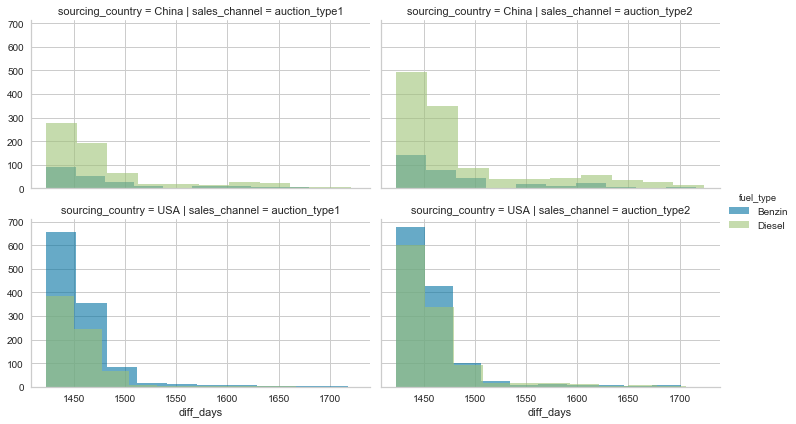

In [104]:
plt.figure(figsize=(45,10))
g = sns.FacetGrid(auto0, row='sourcing_country', col='sales_channel', hue = 'fuel_type', aspect=1.7)
g.map(plt.hist, "diff_days", alpha = 0.6)
g.add_legend()
plt.show()

In [105]:
auto0.groupby('sales_channel')['diff_days'].mean()

sales_channel
auction_type1    1464.244160
auction_type2    1468.759435
Name: diff_days, dtype: float64

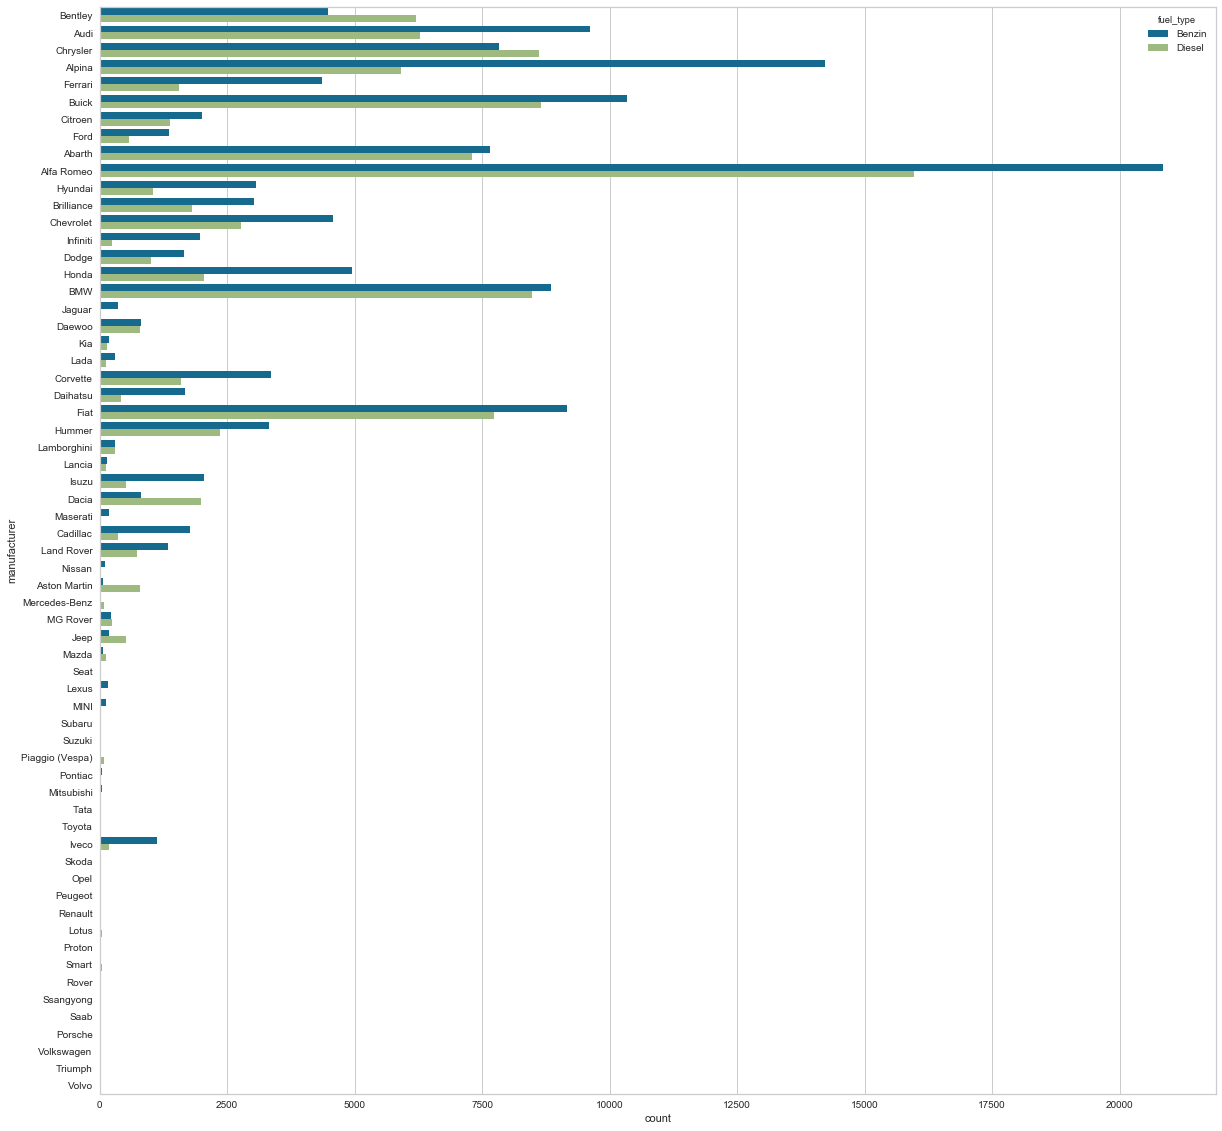

In [106]:
plt.figure(figsize=(20,20))
sns.countplot(y="manufacturer", hue = 'fuel_type',data=auto)

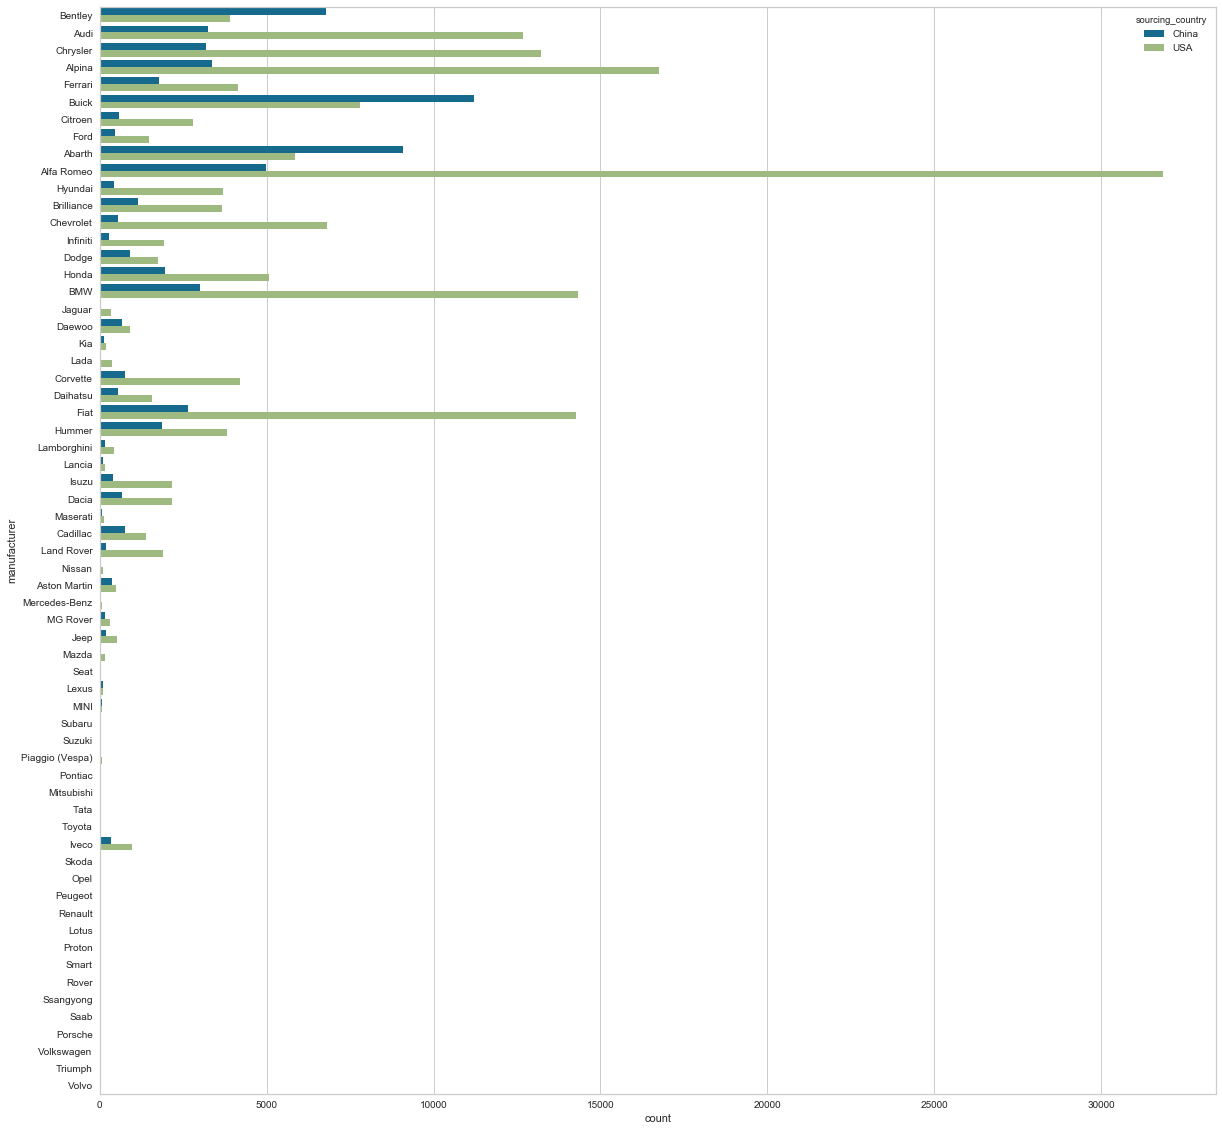

In [107]:
plt.figure(figsize=(20,20))
sns.countplot(y="manufacturer", hue = 'sourcing_country',data=auto)

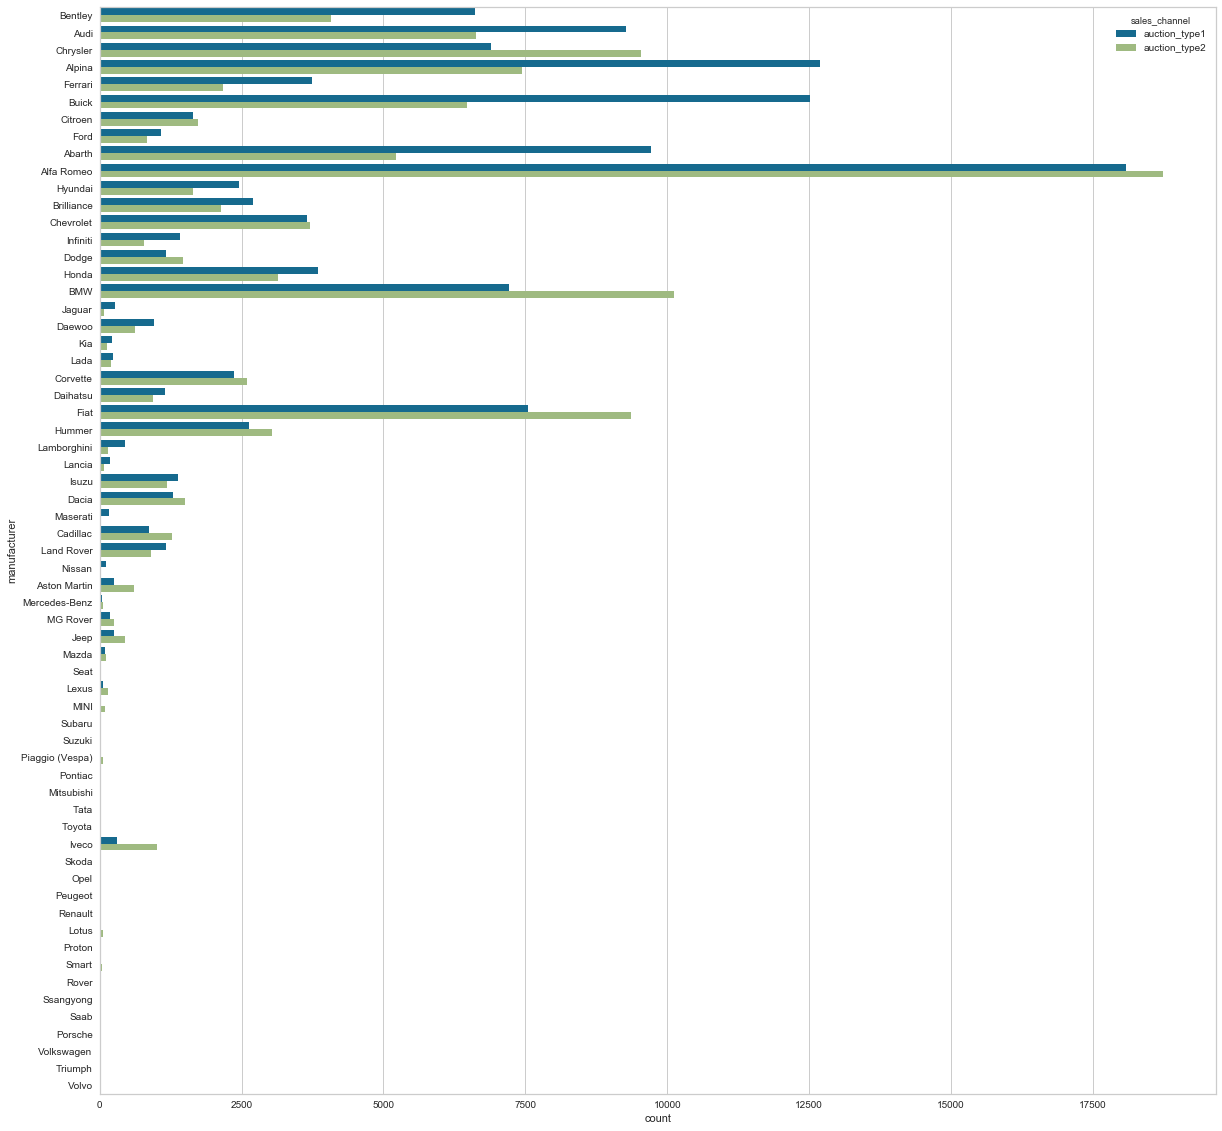

In [108]:
plt.figure(figsize=(20,20))
sns.countplot(y="manufacturer", hue = 'sales_channel',data=auto)

### Question 1c:
Which sales channel would you recommend to sell our cars for our business? What
additional information would be helpful to support your recommendation? Please elaborate &
explain your logic behind your answers in detail.

### Important points:
- in China mostly sold diesel car, in USA benzin
- most sales were done by auction type1
- auction type1 is in average 4 days faster in sales
- diesel cars in China by auction type1 are sold faster than benzin one
- benzin cars in USA by auction type 2 are sold faster than diesel
- Bentley, Chrysler, Dacia, Aston martin, MG rover, Jeep and Mazda are outperform in sales benzin cars
- Bentley, Buick and Abarth are mostly popular in China

Prevalent cars for type1 auction:
Bentley, Audi, Alpina, Ferrari, Buick, Abarth, Huandai, Brilliance, Infiniti, Honda, Jaguar, Daewoo

Prevalent cars for type2 auction:
Chrysler, BMW, Fiat, Aston Martin, Jeep, Lexus, MINI, Iveco



Let's have a look on cars which is still not sold

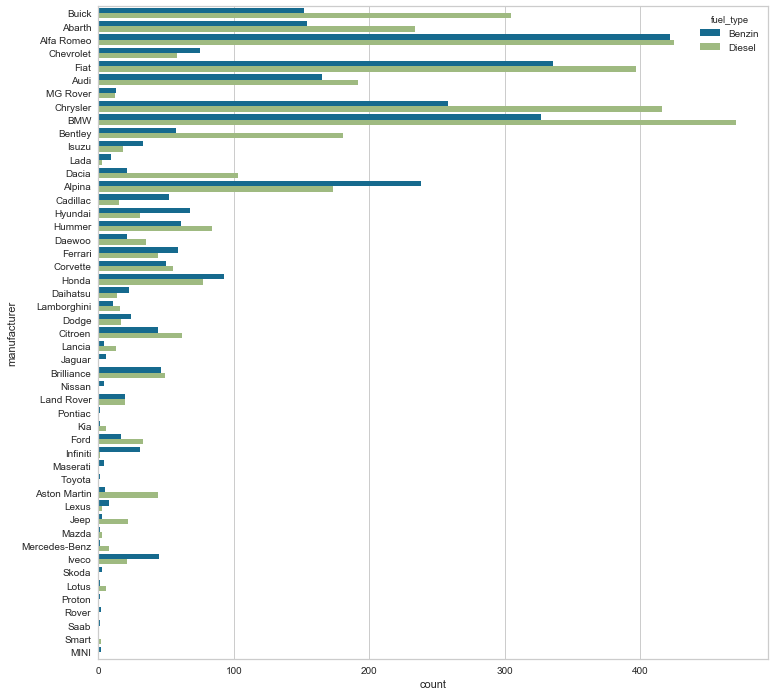

In [109]:
plt.figure(figsize=(12,12))
sns.countplot(y="manufacturer", hue="fuel_type", data=auto0)

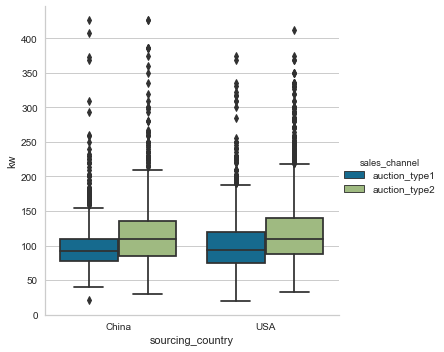

In [110]:
sns.catplot(x="sourcing_country", y="kw", hue="sales_channel", kind="box", data=auto0)

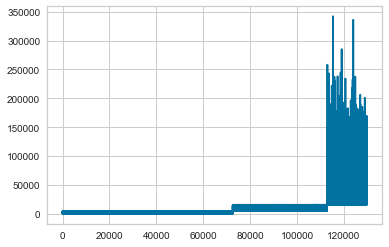

In [111]:
plt.plot(auto['buy_price'].loc[auto['sales_channel'] == 'auction_type1'])

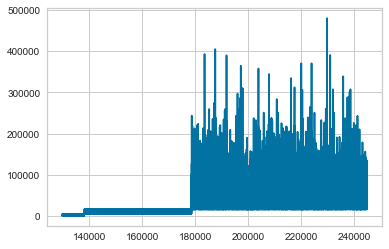

In [112]:
plt.plot(auto['buy_price'].loc[auto['sales_channel'] == 'auction_type2'])

In [113]:
medians_auto = auto[auto['sales_channel']=='auction_type1'].groupby(['sourcing_country'])['kw'].median().values
medians_auto0 = auto0[auto0['sales_channel']=='auction_type1'].groupby(['sourcing_country'])['kw'].median().values
print('Median kw for sold cars on type1 auction in Usa, China:', medians_auto, 'and not sold', medians_auto0)

Median kw for sold cars on type1 auction in Usa, China: [77. 77.] and not sold [92. 93.]


In [114]:
medians_auto = auto[auto['sales_channel']=='auction_type2'].groupby(['sourcing_country'])['kw'].median().values
medians_auto0 = auto0[auto0['sales_channel']=='auction_type2'].groupby(['sourcing_country'])['kw'].median().values
print('Median kw for sold cars on type1 auction in Usa, China:', medians_auto, 'and not sold', medians_auto0)

Median kw for sold cars on type1 auction in Usa, China: [ 88. 100.] and not sold [110. 110.]


In [115]:
medians_auto = auto[auto['sales_channel']=='auction_type1'].groupby(['sourcing_country'])['built_year'].median().values
medians_auto0 = auto0[auto0['sales_channel']=='auction_type1'].groupby(['sourcing_country'])['built_year'].median().values
print('Median built_year for sold cars on type1 auction in Usa, China:', medians_auto, 'and not sold', medians_auto0)

Median built_year for sold cars on type1 auction in Usa, China: [2005 2005] and not sold [2007 2006]


In [116]:
medians_auto = auto[auto['sales_channel']=='auction_type2'].groupby(['sourcing_country'])['built_year'].median().values
medians_auto0 = auto0[auto0['sales_channel']=='auction_type2'].groupby(['sourcing_country'])['built_year'].median().values
print('Median built_year for sold cars on type2 auction in Usa, China:', medians_auto, 'and not sold', medians_auto0)

Median built_year for sold cars on type2 auction in Usa, China: [2010 2010] and not sold [2011 2010]


### Some additional points:
- we can compare by manufacturer cars and see, for ex., that Buick on benzil is better in sales that on diesel, so that many diesel cars are still not sold
- kw for not sold cars by both auction types is higher than for sold one
- the built year for not sold cars is higher for auction type 1 
- looks like auction type 2 works with more expensive cars

# Part 2 - Modeling & Model comparison
### Question 2:
Please evaluate and interpret the classifier in the provided Jupyter Notebook - you can also
see the output using HTML file. Here are some hints:
- How would you interpret the results?
- Is the classifier well chosen and trained?
- Do you agree with the validation?
- Based on your analysis what would you add/change?

In [117]:
rawdata = pd.read_csv(data)
# clean data
def mark_missing(value):
    tv = str(value)
    if tv.strip() in '?':
        return np.nan
    return value

data = rawdata.copy()

  
columns_to_use = ['mileage', 'kw', 'buy_price', 'built_year']
ohe_col = ['sourcing_country', 'manufacturer', 'fuel_type']
ohe = pd.get_dummies(data[ohe_col])
display(ohe.head())
data = data[columns_to_use]
data = pd.concat([data, ohe], axis=1)

# drop nulls
data = data.dropna(axis=0)
data.head()

,sourcing_country_China,sourcing_country_USA,manufacturer_Abarth,manufacturer_Alfa Romeo,manufacturer_Alpina,manufacturer_Aston Martin,manufacturer_Audi,manufacturer_BMW,manufacturer_Bentley,manufacturer_Brilliance,...,manufacturer_Ssangyong,manufacturer_Subaru,manufacturer_Suzuki,manufacturer_Tata,manufacturer_Toyota,manufacturer_Triumph,manufacturer_Volkswagen,manufacturer_Volvo,fuel_type_Benzin,fuel_type_Diesel
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


,mileage,kw,buy_price,built_year,sourcing_country_China,sourcing_country_USA,manufacturer_Abarth,manufacturer_Alfa Romeo,manufacturer_Alpina,manufacturer_Aston Martin,...,manufacturer_Ssangyong,manufacturer_Subaru,manufacturer_Suzuki,manufacturer_Tata,manufacturer_Toyota,manufacturer_Triumph,manufacturer_Volkswagen,manufacturer_Volvo,fuel_type_Benzin,fuel_type_Diesel
0,84569,44.0,3642.0,2005,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,173065,100.0,4865.0,2006,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,133179,51.0,1875.0,2007,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,256134,96.0,4064.0,2003,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,102892,74.0,2656.0,2000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [118]:
# prepare classifier

def add_labels(value):
    v = np.ceil(value / 2000)
    if v > 4:
        v = 5
    return v
label = data['buy_price'].apply(lambda x: add_labels(x))
label = np.array(label)
data = data[[i for i in data.columns if i != 'price']]
features = data.values


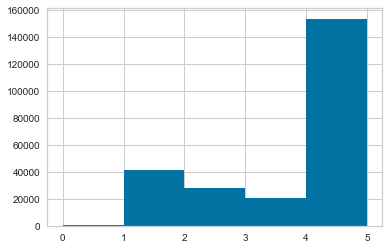

In [119]:
plt.hist(label, bins=5)
plt.show()

In [ ]:
# train classifier
#RF = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1)
#scores = cross_val_score(RF, features, label, cv=5)
#display("Accuracy {:.3f} +/- {:.3f}".format(sc.mean(scores), sc.std(scores)))

#train_feature, test_feature, train_label, test_label = train_test_split(features, label, test_size=0.33, random_state=42)
#RF.fit(train_feature, train_label)
#pred = RF.predict(test_feature)
#res = test_label - pred
#display("Accuracy {:.3f}".format(accuracy_score(test_label, pred)))
#plt.hist(pred,bins=5, color='green')
#plt.show()

In [ ]:
#cm = pd.DataFrame(confusion_matrix(test_label, pred), index = list(set(label)), columns = list(set(label)))

In [ ]:
#sns.heatmap(cm, annot = True, 
#            cmap=sns.color_palette("GnBu")).set(xlabel='predicted values', 
#                                                ylabel='real values', 
#                                                title = 'Confusion Matrix')
#display(cm)

### Question 3a:
Please provide a very simple model that allows to predict the buy price, based on the given
dataset.
Please explain each of your design choices, e.g. processing, model selection, hyper
parameters, and evaluation criteria.

I will proceed as following:
- choose feature columns
- transform categorical features to numerical
- transform continues values from buy_price to clusters. 
- make a price prediction based on regression model in each cluster

As regression model I choose the RandomForestRegressor. From amount of regression models, I decided that this one will fit our data better. Hypperparameters I choose through GridSearchCV.

In [120]:
auto1data = auto1data.drop(['bought_date', 'sold_date', 'sold', 'buy_price'],axis=1)


In [121]:
def converter(sourcing_country):
        if sourcing_country=='USA':
            return 0
        else:
            return 1

In [122]:
auto1data['sourcing_country'] = auto1data['sourcing_country'].map(converter)

In [123]:
def converter1(fuel_type):
        if fuel_type=='Benzin':
            return 0
        else:
            return 1

In [124]:
auto1data['fuel_type'] = auto1data['fuel_type'].map(converter1)

In [125]:
def converter2(sales_channel):
        if sales_channel=='auction_type1':
            return 0
        else:
            return 1

In [126]:
auto1data['sales_channel'] = auto1data['sales_channel'].map(converter2)

In [127]:
auto1data = pd.get_dummies(auto1data, columns=["manufacturer"], drop_first=True)

In [128]:
X=auto1data
y=auto1data1['buy_price']

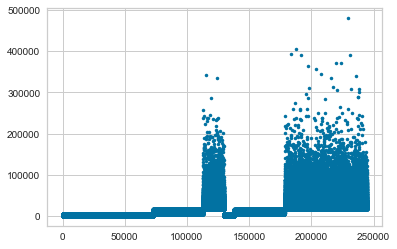

In [129]:
plt.plot(y,'.')

In [130]:
Y=y.copy()
def splitting(value):
    if value < 5000:
        value = 1
    elif (value >= 5000) & (value < 16000):
        value = 2
    else:  
        value = 3
    return value

Y = Y.apply(lambda x: splitting(x))
Y = np.array(Y)

(array([79898.,     0.,     0.,     0.,     0., 80981.,     0.,     0.,
            0., 81373.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

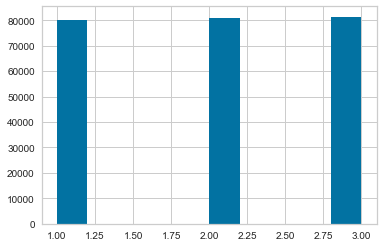

In [131]:
plt.hist(Y)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state = 142)

In [133]:
model = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)


In [134]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [135]:
predict = model.predict(X_test)

In [136]:
print(confusion_matrix(predict, y_test))

[[21826  2005    32]
 [ 2294 20466  2063]
 [    9  1667 22314]]


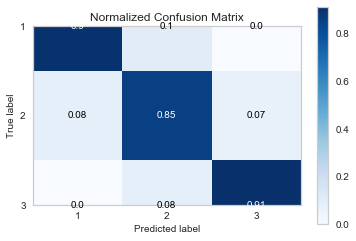

In [137]:
skplt.metrics.plot_confusion_matrix(y_test, predict, normalize=True)

In [138]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       0.91      0.90      0.91     24129
           2       0.82      0.85      0.84     24138
           3       0.93      0.91      0.92     24409

    accuracy                           0.89     72676
   macro avg       0.89      0.89      0.89     72676
weighted avg       0.89      0.89      0.89     72676



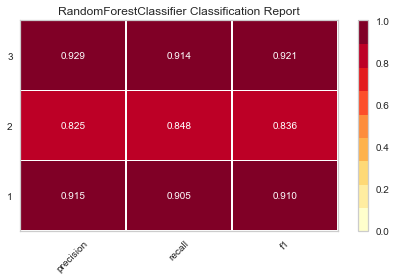

In [139]:
visualizer = ClassificationReport(model, classes=['1','2','3'])
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()

Prediction in classes

In [140]:
auto1data1['sourcing_country'] = auto1data1['sourcing_country'].map(converter)

In [141]:
auto1data1['fuel_type'] = auto1data1['fuel_type'].map(converter1)

In [142]:
auto1data1['sales_channel'] = auto1data1['sales_channel'].map(converter2)

In [143]:
auto1data1 = pd.get_dummies(auto1data1, columns=["manufacturer"], drop_first=True)

In [144]:
auto1data1 = auto1data1.drop(['bought_date','sold_date','sold'],axis=1)

In [145]:
Feature1 = auto1data1[auto1data1['buy_price']<5000]

In [146]:
Feature2 = auto1data1[(auto1data1['buy_price']>5000) & (auto1data1['buy_price']<=16000)]

In [147]:
Feature3 = auto1data1[auto1data1['buy_price']>16000]

In [148]:
Label1, Label2, Label3 = Feature1['buy_price'], Feature2['buy_price'], Feature3['buy_price']

In [149]:
Feature1, Feature2, Feature3 = Feature1.drop('buy_price',axis=1), Feature2.drop('buy_price',axis=1), Feature3.drop('buy_price',axis=1)

### RandomForestRegressor

Best parameters for cluster 1: {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__n_estimators': 100}
R2 score for cluster 1: 0.6068096463539014
Best parameters for cluster 2: {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__n_estimators': 100}
R2 score for cluster 2: 0.6071499026042153
Best parameters for cluster 3: {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__n_estimators': 100}
R2 score for cluster 3: 0.8738368230529364


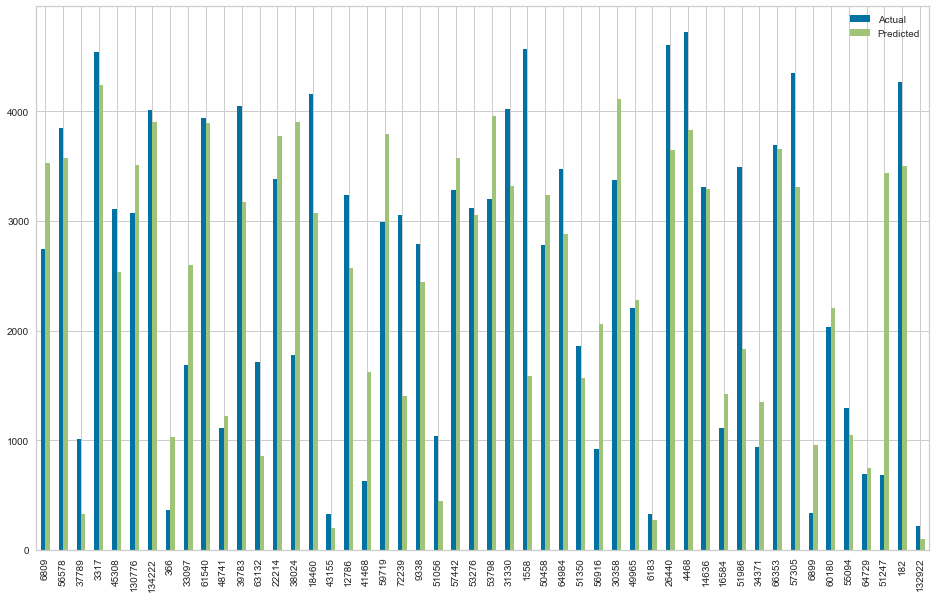

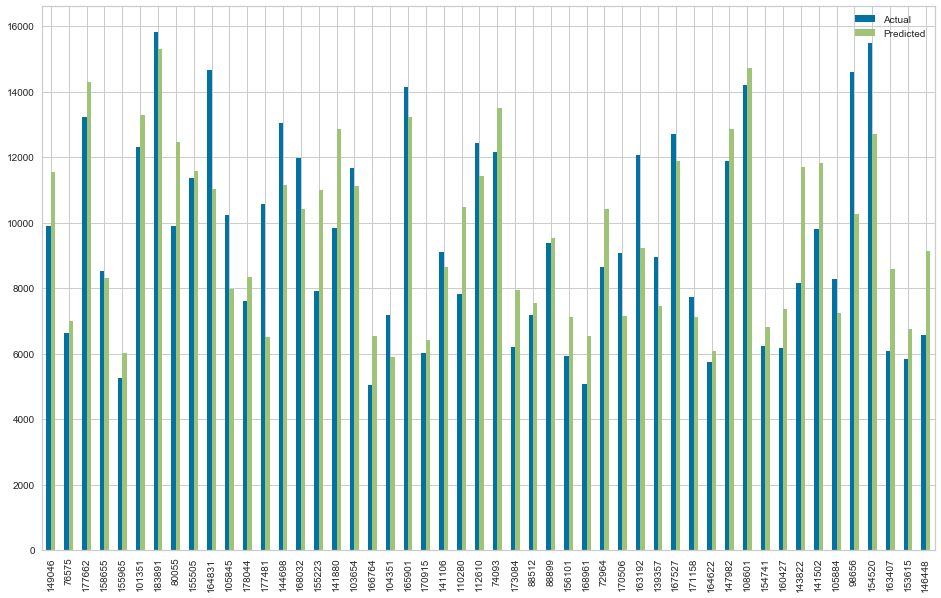

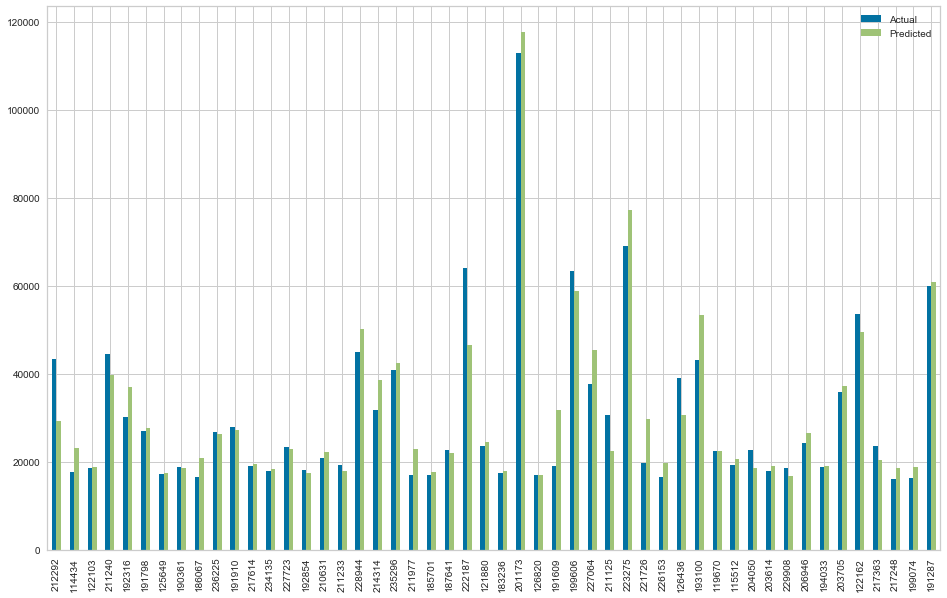

In [150]:
for i in range(1,4):
    train_features, test_features, train_labels, test_labels = train_test_split(locals()["Feature"+str(i)], locals()["Label"+str(i)], test_size = 0.3, random_state = 142)
    hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'log2'],
                        'randomforestregressor__max_depth': [None, 5, 10], 
                        'randomforestregressor__n_estimators': [10, 50, 100]
                  }
    pipeline = make_pipeline(RandomForestRegressor())
    clf = GridSearchCV(pipeline, hyperparameters, cv=10)
    clf.fit(locals()["Feature"+str(i)],locals()["Label"+str(i)])
    best_params =clf.best_params_
    regressor = RandomForestRegressor(max_features=best_params['randomforestregressor__max_features'], 
                                      max_depth= best_params['randomforestregressor__max_depth'],
                                      n_estimators = best_params['randomforestregressor__n_estimators'])
    regressor.fit(train_features, train_labels)
    y_pred = regressor.predict(test_features)
    print('Best parameters for cluster %s:' % (i), clf.best_params_)
    print('R2 score for cluster %s:' % (i), r2_score(test_labels, y_pred))
    df = pd.DataFrame({'Actual': test_labels, 'Predicted': y_pred})
    df1 = df.head(50)
    df1.plot(kind='bar',figsize=(16,10))

### Question 3b:
Compare and contrast your model with the provided classifier.

If we plot the price data, we will see that the data has a very clustering nature and therefore the idea to devide into the classes seems to be a good choice. However, the idea to divide data on 2000 should be based on for ex. particular business task, as well as the decision to make 5 clusters. In such aproach we overload the 5th cluster and do not make difference between cars with price more than 10000 (business idea?). 
On the preprocessing step, NaN values were deleted, categorical columns were converted to numerical, no outliers search was made. Why the sales_channel is not used as the feature?

Comparing the results between classifiers:
- the accuracy score of the provided classifier is higher (97% against mine 88%), but that can be the result of imbalanced data. As I wrote already, according to proposed classifier method, the most data are ended in class 5. So the accuracy score is high but not so trustfull.
- as I mentioned I do not undestand the idea deviding data on 2000 only if it is needed for specific business case. Therefore, I devided data according to the visual clustering: (,5000], (5000,16000], (16,0000), which gave we nice ballanced three classes. The accuracy score is not so impressive but more reliable. I do not normilize the data, as for the random forest which is tree based algorithm and do not depend on Euclidean distance, normalization will give the same result. In case of mine model, the 3d class (cars with price > 16000) is predicted better: r2=87%. For the 1st and 2nd class the estimation is almost equal and give us in terms of r2 score 60%.